In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

In [3]:
# Configure the custom library path
import os
import sys

module_path = os.path.abspath(os.path.join('../'))
sys.path.insert(0, module_path)

In [4]:
# Import custom library
from lib import find_period, find_min_values, find_max_values

In [5]:
# Read the data
data = pd.read_csv('./data/data.csv', delimiter=',')

In [6]:
D1 = {
    '1/(u)^1/2': data['1/(u)^1/2'][~np.isnan(data['1/(u)^1/2'])].values,
    'D1': data['D1'][~np.isnan(data['D1'])].values
}

D2 = {
    '1/(u)^1/2': data['1/(u)^1/2'][~np.isnan(data['1/(u)^1/2'])].values,
    'D2': data['D2'][~np.isnan(data['D2'])].values
}


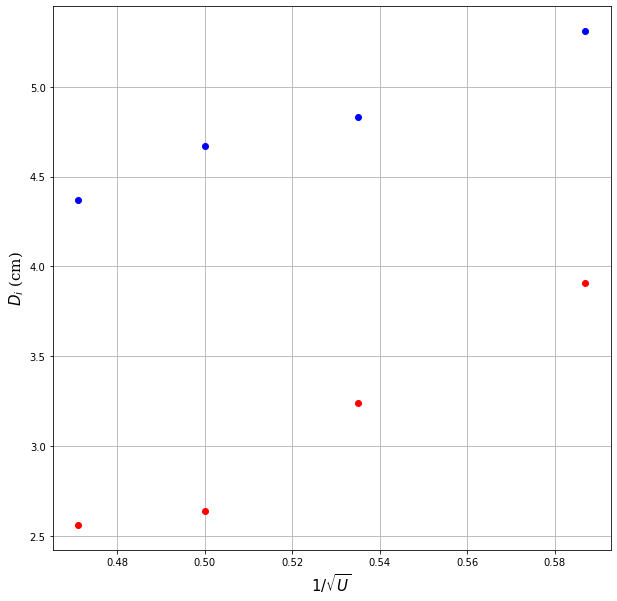

In [7]:
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

plt.plot(D1['1/(u)^1/2'], D1['D1'], 'o', color = 'red')
plt.plot(D2['1/(u)^1/2'], D2['D2'], 'o', color = 'blue')
# plt.plot(R_CUAD_del_mas, W2_CUAD_del_mas, '--', color = 'gray')
# plt.plot(R_CUAD_del_men, W2_CUAD_del_men, '--', color = 'gray')
# plt.title("$\omega_2^2 \:  vs \:  \epsilon^2$", fontdict = font1)
plt.xlabel('$1/\sqrt{U}$', fontdict = font2)
plt.ylabel('$D_i$ (cm)', fontdict = font2)
plt.grid()
plt.show()

In [12]:
x = D1['1/(u)^1/2']
y = D1['D1']

# do the fit and get the parameters
slope1, intercept1, _, _, _ = stats.linregress(D1['1/(u)^1/2'], D1['D1'])
slope2, intercept2, _, _, _ = stats.linregress(D2['1/(u)^1/2'], D2['D2'])

d1  = 0.000000000213
d2  = 0.000000000123
m_e = 1.6E-019
e = 9.1E-28
L = 13.5

h1 = (slope1 * d1 * np.sqrt(2 * m_e * e)) / (2 * L)
h2 = (slope2 * d2 * np.sqrt(2 * m_e * e)) / (2 * L)

print(h1)
print(h2)


1.6608356687611713e-33
6.070642426418516e-34


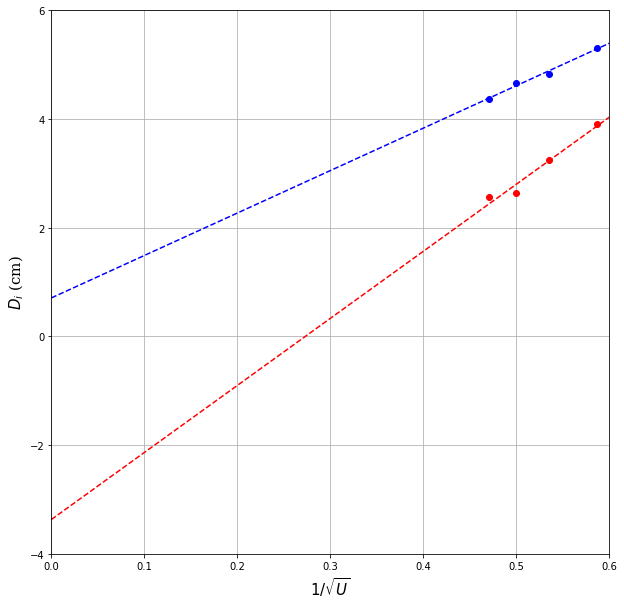

In [22]:
font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'black','size':15}

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

# start the x axis at 0
plt.xlim(0,0.6)
plt.ylim(-4,6)

x = np.linspace(0, 0.6, 100)

plt.plot(D1['1/(u)^1/2'], D1['D1'], 'o', color = 'red')
plt.plot(D2['1/(u)^1/2'], D2['D2'], 'o', color = 'blue')
plt.plot(x, intercept1 + slope1 * x, '--', color = 'red')
plt.plot(x, intercept2 + slope2 * x, '--', color = 'blue')
plt.xlabel('$1/\sqrt{U}$', fontdict = font2)
plt.ylabel('$D_i$ (cm)', fontdict = font2)
plt.grid()
plt.show()